In [25]:
%reload_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib notebook

In [26]:
from load_and_aggregate_height import *
from geo_scripts.process_height import *
import matplotlib.pyplot as plt
from dithering import *
from geo_scripts.process_height import *
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import os
import georasters as gr

In [27]:
water_shape = geopandas.read_file(os.path.expanduser("~/Downloads/datasets/natural_earth/ne_50m_ocean/ne_50m_ocean.shp"))
raster = get_global_raster(32)
rasterized_shape = rasterize_shapefile(water_shape, raster)
water_mask = rasterized_shape
raster.raster[water_mask] = np.ma.masked
x_ranges = list(gen_ranges(-180, 180, 1))
y_ranges = list(gen_ranges(90, -90, 1))
slices = get_slices(raster, x_ranges, y_ranges)

def masked_percent(im_slice):
    if im_slice is None:
        return 1.0
    else:
        return np.mean(im_slice.mask)

sl_ag = aggregate_slices(slices, how)
# plt.imshow(sl_ag)

<IPython.core.display.Javascript object>


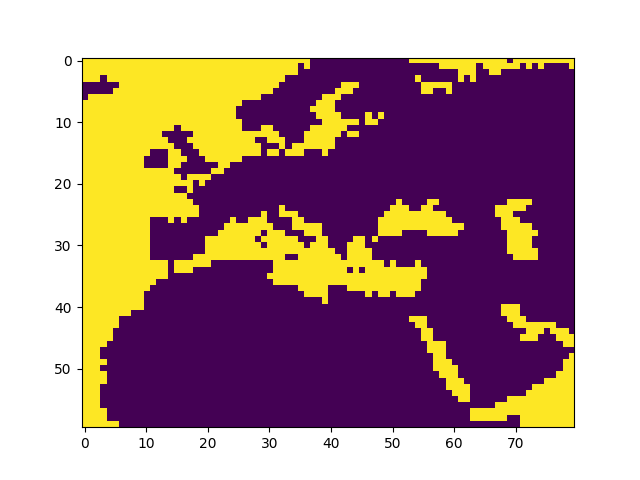

In [28]:
dithered, error = dither_mask_error(sl_ag)
plt.imshow(dithered[20:80,160:240])

<IPython.core.display.Javascript object>


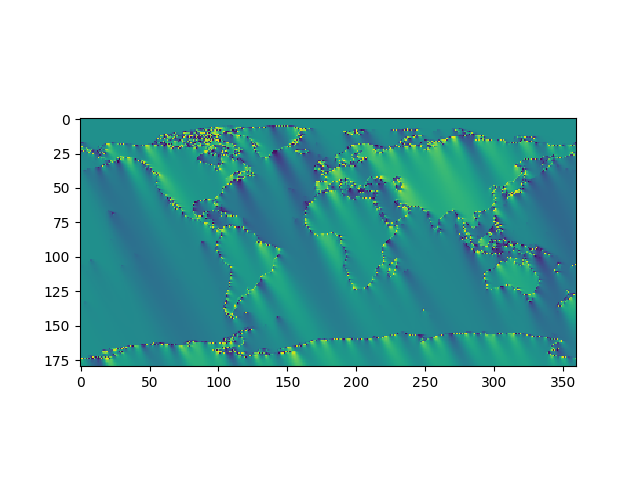

In [29]:
plt.imshow(error)

<IPython.core.display.Javascript object>


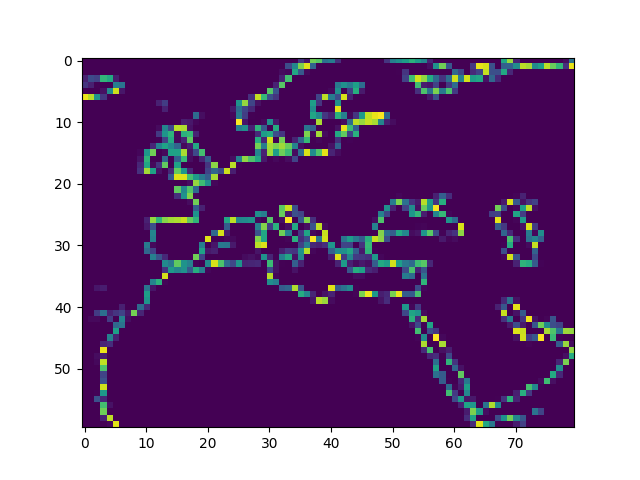

In [30]:
base_error =.5 - abs(sl_ag - .5)
plt.imshow(base_error[20:80,160:240])

In [31]:
# I think I want to almost do the probability density thing:
"""
pick the tile with the lowest error
set it to most probable value
divide that leftover error to the rest of the cells
repeat until all are done.

Or I can just use the chelsea mask. It's good enough,
I just have to get the casipian sea and great lakes masks
"""

"\npick the tile with the lowest error\nset it to most probable value\ndivide that leftover error to the rest of the cells\nrepeat until all are done.\n\nOr I can just use the chelsea mask. It's good enough,\nI just have to get the casipian sea and great lakes masks\n"

In [32]:
df_river = geopandas.read_file(os.path.expanduser("~/Downloads/datasets/natural_earth/ne_50m_rivers_lake_centerlines_scale_rank/ne_50m_rivers_lake_centerlines_scale_rank.shp"))

<IPython.core.display.Javascript object>


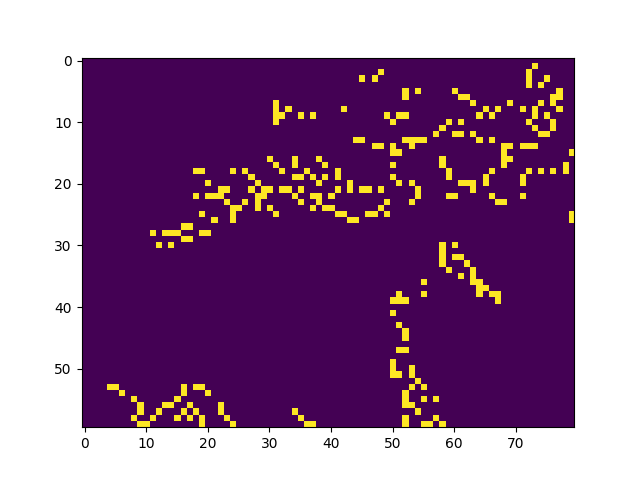

In [33]:
# dither test rivers
raster = get_global_raster(2)
river_r = rasterize_shapefile(df_river, raster)
raster.raster[river_r] = np.ma.masked
slices = get_slices(raster, x_ranges, y_ranges)

def masked_percent(im_slice):
    if im_slice is None:
        return 1.0
    else:
        return np.mean(im_slice.mask)

sl_ag = aggregate_slices(slices, how)

dithered, error = dither_mask_error(sl_ag)
plt.imshow(dithered[20:80,160:240])